<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/CNN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.datasets.mnist import load_data

In [15]:
(train_data, train_label), (test_data, test_label) = load_data()
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Getting to know the Data

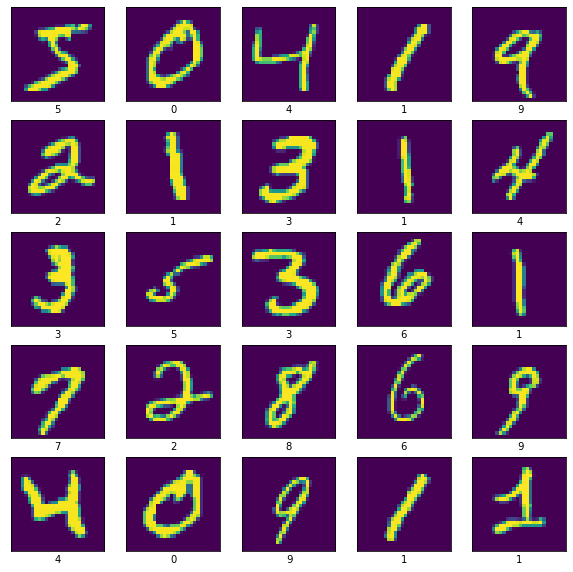

In [16]:
# Copyed from the tensorflow tutorial 
classes = ['0', '1', '2', '3', '4','5', '6', '7', '8', ' 9']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i])
    # which is why you need the extra index
    plt.xlabel(classes[train_label[i]])
plt.show()

## Preprocessing

In [17]:
# Standardizing
train_images = train_data/255
test_images = test_data/255

In [18]:
# Reshaping the images
train_images_s = np.reshape(train_images, (60000, 28, 28, 1))
test_images_s = np.reshape(test_images.copy(), (10000, 28, 28, 1))

In [19]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_label, num_classes = 10)
test_labels = to_categorical(test_label.copy(), num_classes = 10)

In [20]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

## Model

In [21]:
input = Input(shape = (28, 28, 1))

conv1 = Conv2D(32, (2,2),  activation = 'relu')

x = conv1(input)
x = MaxPooling2D((2,2)) (x)
x = Conv2D(16, (2,2), activation = 'relu') (x)
x = Flatten() (x)

x = Dense(32, activation = 'relu') (x)

output = Dense(10, activation = 'softmax') (x)

model = tf.keras.models.Model(input, output)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                73760     
                                                           

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
r = model.fit(train_images_s, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2235 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0721 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0503 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 35s 19m

## After the Model

In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0600 - accuracy: 0.9849


[0.0600191168487072, 0.9848999977111816]

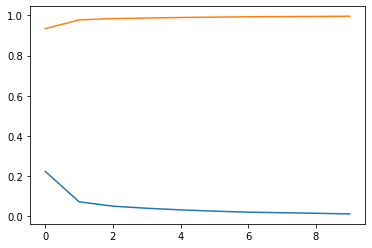

In [28]:
# Loss and Accuracy
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['accuracy'], label = 'accuracy')

In [29]:
preds = model.predict(test_images)

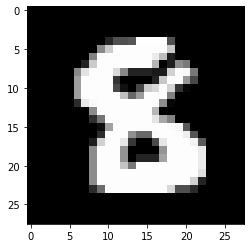

Predicted: 8
Actual: 8


In [30]:
# Predictions
import random
i = random.randint(0, 10001)

plt.imshow(np.reshape(test_images[i], (28, 28)), cmap = 'gray')
plt.show()

print(f"Predicted: {preds[i].argmax()}")
print(f"Actual: {test_labels[i].argmax()}")

## Saving and Loading

In [31]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model/assets


In [32]:
new_model = tf.keras.models.load_model('mnist_model')
new_preds = new_model.predict(test_images)

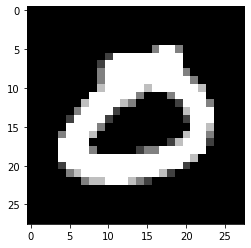

Predicted: 0
Actual: 0


In [33]:
import random
i = random.randint(0, 10001)

plt.imshow(np.reshape(test_images[i], (28, 28)), cmap = 'gray')
plt.show()

print(f"Predicted: {new_preds[i].argmax()}")
print(f"Actual: {test_labels[i].argmax()}")